# Importação de bibliotecas

In [63]:
import pandas as pd
from scipy.stats import normaltest
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import CompareMeans
from scipy.stats import wilcoxon, ranksums
import seaborn as sns

# Carregamento dos dados

In [17]:
amostras = pd.read_csv('/Users/mikeiasoliveira/Documents/Projetos/análise_dados_enem/analise-dados-enem/dados/amostras/amostra-redacao.csv', sep =';')

# Limpeza dos dados

In [18]:
amostras = amostras.dropna(subset= 'NU_NOTA_REDACAO')

# Testes estatísticos

----
----

## Teste de normalidade

In [19]:
stats_normTestRedacao, pValor_normTestRedacao = normaltest(amostras.NU_NOTA_REDACAO)
print(f'O P-value é igual a: {round(pValor_normTestRedacao, 2)}')


O P-value é igual a: 0.21


$ H_0: $ A distribuição provém de uma distribuição normal <br>
$ H_1: $ A distribuição não provém de uma distribuição normal <br>
$ p-value > \alpha $ <br><br>

<font color='green'>A amostra provém de uma distribuição normal</font>


----

In [20]:
amostras.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

## Análise por parâmetros

Temos que:

Código|Raça|
------|----|
0|Não declarado
1|Branca
2|Preta
3|Parda
4|Amarela
5|Indígena 

In [21]:
amostras.TP_COR_RACA.replace({0:'Não declarado', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'}, inplace = True)

---

### Automatizando teste estatístico

#### Sexo

In [41]:
def teste_hipotese_redacao(dados, hipotese, coluna_teste):
    sexo_1 = list(dados[coluna_teste].unique())
    sexo_2 = list(dados[coluna_teste].unique())

    sexo_pd_1 = []
    sexo_pd_2 = []
    p_values = []
    hipoteses = []

    validacao = []

    for i in sexo_1:
        for j in sexo_2:
            if i != j:


                amostras_i = amostras.query(f"{coluna_teste} == '{i}'")['NU_NOTA_REDACAO']
                amostras_j = amostras.query(f"{coluna_teste} == '{j}'")['NU_NOTA_REDACAO']
                        
                teste_i = DescrStatsW(amostras_i)
                teste_j = DescrStatsW(amostras_j)
                        

                sexo_pd_1.append(i)
                sexo_pd_2.append(j)

                teste = teste_i.get_compare(teste_j)
                _, p_value = teste.ztest_ind(alternative = hipotese)
                p_values.append(p_value)

                if p_value > 0.05:
                    hipoteses.append('Aceito')
                else:
                    hipoteses.append('Rejeitado')
        sexo_2.remove(i)
    df_hipotese = pd.DataFrame({f'{coluna_teste}_1': sexo_pd_1, f'{coluna_teste}_2':sexo_pd_2, 'p_value':p_values, 'hipotese':hipoteses})
    return df_hipotese


---

$H_0$: A nota da média redação de Mulheres é igual a de Homens<br>
$H_1$: A nota da média redação de Mulheres é diferente a de Homens

In [46]:
teste_hipotese_redacao(amostras, 'two-sided', 'TP_SEXO')

,TP_SEXO_1,TP_SEXO_2,p_value,hipotese
0,F,M,0.000021,Rejeitado


$H_0$: A nota da média redação de Mulheres é igual a de Homens <br> <font color='red'>Rejeitado</font> <br><br>
$H_1$: A nota da média redação de Mulheres é diferente a de Homens <br> <font color='green'>Aceito</font> <br><br>

---

$H_0$: A nota da média redação de Mulheres é menor do que de Homens<br>
$H_1$: A nota da média redação de Mulheres é maior do que de Homens

In [45]:
teste_hipotese_redacao(amostras, 'smaller', 'TP_SEXO')

,TP_SEXO_1,TP_SEXO_2,p_value,hipotese
0,F,M,0.999989,Aceito


In [30]:
amostras.groupby('TP_SEXO').NU_NOTA_REDACAO.mean()

TP_SEXO
F    663.113208
M    585.263158
Name: NU_NOTA_REDACAO, dtype: float64

In [27]:
amostras.TP_SEXO.value_counts(normalize=True)

F    0.553525
M    0.446475
Name: TP_SEXO, dtype: float64

$H_0$: A nota da média redação de Mulheres é menor a de Homens <br> <font color='red'>Rejeitado</font> <br><br>
$H_1$: A nota da média redação de Mulheres é maior a de Homens <br> <font color='green'>Aceito</font> <br><br>

---

#### Raças

In [53]:
amostras_estratificadas = pd.read_csv('/Users/mikeiasoliveira/Documents/Projetos/análise_dados_enem/analise-dados-enem/dados/amostras/amostra-estratificada-raca.csv', sep =';')
amostras_estratificadas.TP_COR_RACA.replace({0:'Não declarado', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'}, inplace = True)

In [54]:
teste_hipotese_redacao(amostras_estratificadas, 'two-sided', 'TP_COR_RACA')

,TP_COR_RACA_1,TP_COR_RACA_2,p_value,hipotese
0,Preta,Parda,0.278451,Aceito
1,Preta,Branca,0.005582,Rejeitado
2,Preta,Não declarado,0.781571,Aceito
3,Preta,Amarela,0.139108,Aceito
4,Preta,Indígena,0.821242,Aceito
5,Parda,Branca,0.001954,Rejeitado
6,Parda,Não declarado,0.372763,Aceito
7,Parda,Amarela,0.325545,Aceito
8,Parda,Indígena,0.542774,Aceito
9,Branca,Não declarado,0.076098,Aceito


##### Através dos teste de hipóteses e considerando um nível de confiança de 95%, tivemos que:

$H_0$: A nota da média redação de Brancos é igual a de Pretos <br> <font color='red'>Rejeitado</font> <br><br>
$H_0$: A nota da média redação de Brancos é igual a de Pardos  <br> <font color='red'>Rejeitado</font><br><br>

In [59]:
teste_hipotese_redacao(amostras_estratificadas, 'larger', 'TP_COR_RACA')

,TP_COR_RACA_1,TP_COR_RACA_2,p_value,hipotese
0,Preta,Parda,0.860774,Aceito
1,Preta,Branca,0.997209,Aceito
2,Preta,Não declarado,0.390786,Aceito
3,Preta,Amarela,0.930446,Aceito
4,Preta,Indígena,0.410621,Aceito
5,Parda,Branca,0.999023,Aceito
6,Parda,Não declarado,0.186382,Aceito
7,Parda,Amarela,0.837227,Aceito
8,Parda,Indígena,0.271387,Aceito
9,Branca,Não declarado,0.038049,Rejeitado


In [60]:
teste_hipotese_redacao(amostras_estratificadas, 'smaller', 'TP_COR_RACA')

,TP_COR_RACA_1,TP_COR_RACA_2,p_value,hipotese
0,Preta,Parda,0.139226,Aceito
1,Preta,Branca,0.002791,Rejeitado
2,Preta,Não declarado,0.609214,Aceito
3,Preta,Amarela,0.069554,Aceito
4,Preta,Indígena,0.589379,Aceito
5,Parda,Branca,0.000977,Rejeitado
6,Parda,Não declarado,0.813618,Aceito
7,Parda,Amarela,0.162773,Aceito
8,Parda,Indígena,0.728613,Aceito
9,Branca,Não declarado,0.961951,Aceito


In [61]:
teste_hipotese_redacao(amostras_estratificadas, 'two-sided', 'TP_COR_RACA')

,TP_COR_RACA_1,TP_COR_RACA_2,p_value,hipotese
0,Preta,Parda,0.278451,Aceito
1,Preta,Branca,0.005582,Rejeitado
2,Preta,Não declarado,0.781571,Aceito
3,Preta,Amarela,0.139108,Aceito
4,Preta,Indígena,0.821242,Aceito
5,Parda,Branca,0.001954,Rejeitado
6,Parda,Não declarado,0.372763,Aceito
7,Parda,Amarela,0.325545,Aceito
8,Parda,Indígena,0.542774,Aceito
9,Branca,Não declarado,0.076098,Aceito


In [58]:
amostras_estratificadas.groupby('TP_COR_RACA').NU_NOTA_REDACAO.mean()

TP_COR_RACA
Amarela          571.111111
Branca           606.634146
Indígena         498.441558
Não declarado    581.538462
Parda            559.784946
Preta            543.777778
Name: NU_NOTA_REDACAO, dtype: float64

<AxesSubplot: xlabel='TP_COR_RACA', ylabel='NU_NOTA_REDACAO'>

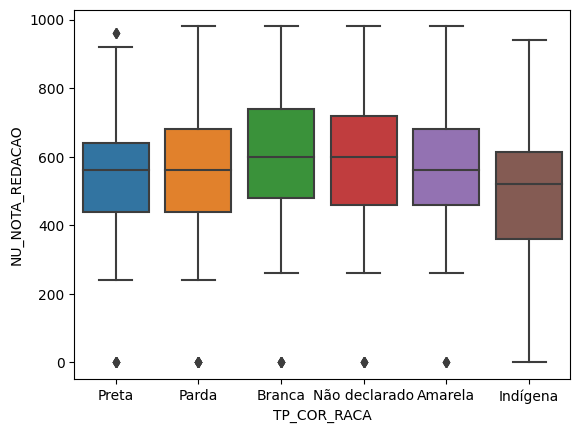

In [64]:
sns.boxplot(amostras_estratificadas, x = 'TP_COR_RACA', y ='NU_NOTA_REDACAO')

In [67]:
amostras_estratificadas = amostras_estratificadas.query("NU_NOTA_REDACAO > 0")

In [68]:
teste_hipotese_redacao(amostras_estratificadas, 'two-sided', 'TP_COR_RACA')

,TP_COR_RACA_1,TP_COR_RACA_2,p_value,hipotese
0,Preta,Parda,0.278451,Aceito
1,Preta,Branca,0.005582,Rejeitado
2,Preta,Não declarado,0.781571,Aceito
3,Preta,Amarela,0.139108,Aceito
4,Preta,Indígena,0.821242,Aceito
5,Parda,Branca,0.001954,Rejeitado
6,Parda,Não declarado,0.372763,Aceito
7,Parda,Amarela,0.325545,Aceito
8,Parda,Indígena,0.542774,Aceito
9,Branca,Não declarado,0.076098,Aceito


In [69]:
teste_hipotese_redacao(amostras_estratificadas, 'larger', 'TP_COR_RACA')

,TP_COR_RACA_1,TP_COR_RACA_2,p_value,hipotese
0,Preta,Parda,0.860774,Aceito
1,Preta,Branca,0.997209,Aceito
2,Preta,Não declarado,0.390786,Aceito
3,Preta,Amarela,0.930446,Aceito
4,Preta,Indígena,0.410621,Aceito
5,Parda,Branca,0.999023,Aceito
6,Parda,Não declarado,0.186382,Aceito
7,Parda,Amarela,0.837227,Aceito
8,Parda,Indígena,0.271387,Aceito
9,Branca,Não declarado,0.038049,Rejeitado


In [70]:
teste_hipotese_redacao(amostras_estratificadas, 'smaller', 'TP_COR_RACA')

,TP_COR_RACA_1,TP_COR_RACA_2,p_value,hipotese
0,Preta,Parda,0.139226,Aceito
1,Preta,Branca,0.002791,Rejeitado
2,Preta,Não declarado,0.609214,Aceito
3,Preta,Amarela,0.069554,Aceito
4,Preta,Indígena,0.589379,Aceito
5,Parda,Branca,0.000977,Rejeitado
6,Parda,Não declarado,0.813618,Aceito
7,Parda,Amarela,0.162773,Aceito
8,Parda,Indígena,0.728613,Aceito
9,Branca,Não declarado,0.961951,Aceito


<AxesSubplot: xlabel='TP_COR_RACA', ylabel='NU_NOTA_REDACAO'>

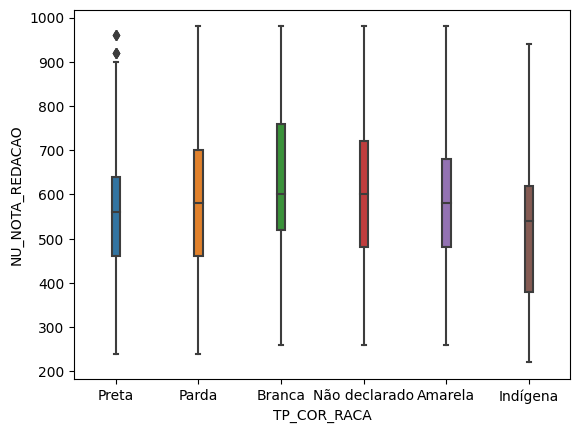

In [74]:
sns.boxplot(amostras_estratificadas, x = 'TP_COR_RACA', y ='NU_NOTA_REDACAO', width = 0.1)

<font color='red'>Importante resaltar que:</font><br><br>

<p>Pelo fato da amostra <font color='red'>não</font> ser quantitativamente suficiente, é incorreto a inferência das hipóteses, portanto, o teste de hipóses de raças é inconclusivo</p>